# 1. Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset 

In [3]:
df = pd.read_csv("train.csv")

# 3. Quick overview

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Realizing

#### Columns with Incorrect Type
   Age - Pclass
#### Columns with Missing Values 
   Age(numeric) - Cabin(too many missing) - Embarked(categorical)

# Check Outliers for Age

Number of Age outliers: 11


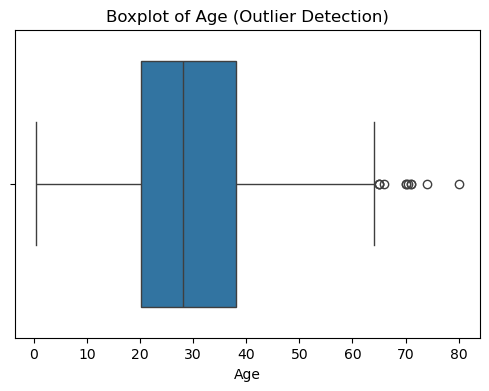

In [9]:
Q1 = df['Age'].quantile(0.25)   # 25th percentile
Q3 = df['Age'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                   # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Number of Age outliers:", outliers.shape[0])

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (Outlier Detection)")
plt.show()

# 4. Handle missing values

In [12]:
# Age is a numerical feature so we fill it with mean because there are outliers
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Cyber-Tech\AppData\Local\Temp\ipykernel_8804\3368108132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
#Embarked is a categorical feature so using the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Cyber-Tech\AppData\Local\Temp\ipykernel_8804\2117030637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [14]:
#Cabin has too many missing values so best option to drop it
df.drop(columns=['Cabin'], inplace=True) 

In [15]:
#check nulls
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 5. Convert data types

In [27]:
df['Pclass'] = df['Pclass'].astype('category')
df['Age'] = df['Age'].astype(int)

In [25]:
# ckeck types
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

# 6. Check Duplicates

In [22]:
df.duplicated().sum()

0

# 7. Summary statistics & group insights

In [28]:
print("\nSurvival Rate by Gender:")
df.groupby('Sex')['Survived'].mean()


Survival Rate by Gender:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [29]:
print("\nSurvival Rate by Class:")
df.groupby('Pclass')['Survived'].mean()


Survival Rate by Class:


C:\Users\Cyber-Tech\AppData\Local\Temp\ipykernel_8804\1730704560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [31]:
print("\nCross Tab Gender vs Survival:")
pd.crosstab(df['Sex'], df['Survived'])


Cross Tab Gender vs Survival:


Survived,0,1
Sex,,
female,81,233
male,468,109


# 8. Visualizations

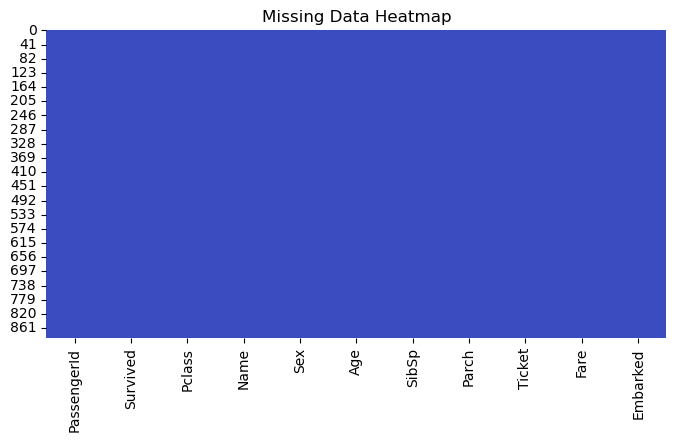

In [38]:
# Missing values heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Data Heatmap")
plt.show()

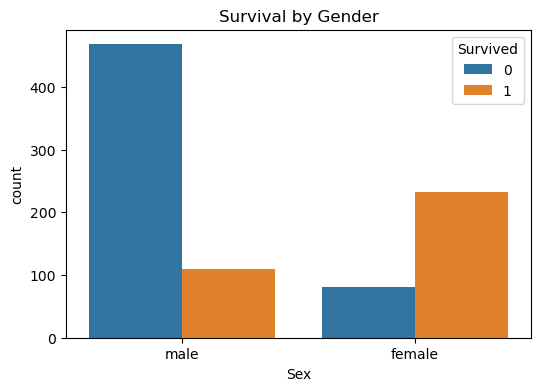

In [37]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

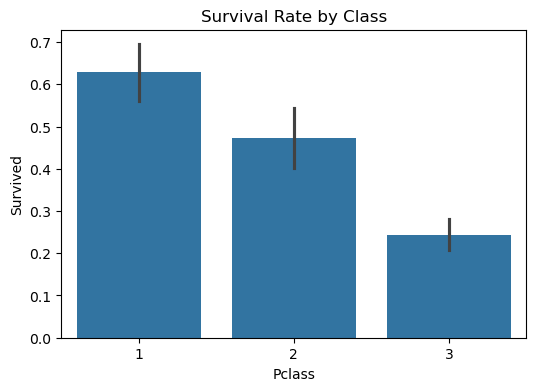

In [39]:
# Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Class")
plt.show()

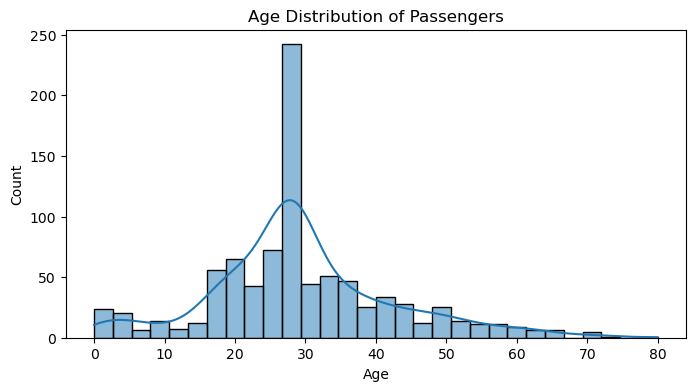

In [40]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

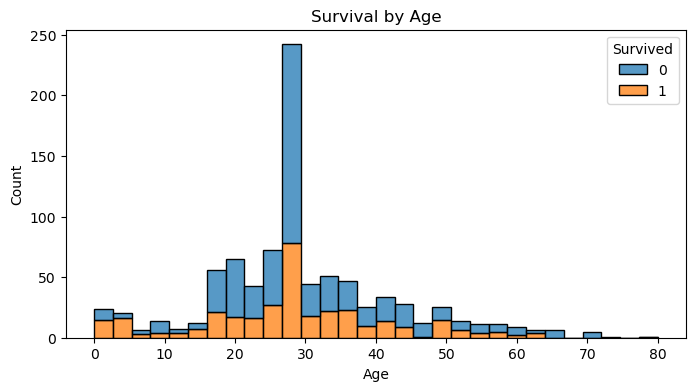

In [41]:
# Survival by Age
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Survival by Age")
plt.show()

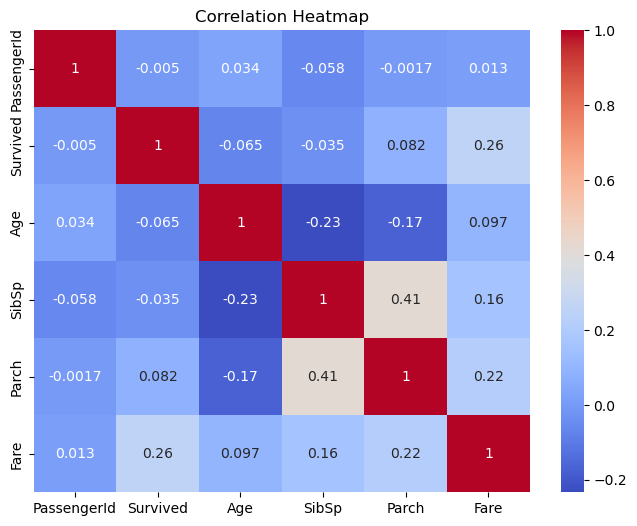

In [42]:
# Correlation heatmap (numerical columns only)
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()